In [ ]:
####    Linear Regression

#environment setup
#import required libraries
import numpy as np
import pandas as pd

In [ ]:
# data collection
# import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [ ]:
print(boston_dataset.DESCR)

In [ ]:
# create a pandas dataframe and store the data
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names

In [ ]:
# append Price, target, as a new columnn to the dataset
df_boston['Price'] = boston_dataset.target

In [ ]:
# print top 5 observations
'''
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
Price: Median value of owner-occupied homes in $1000s
'''
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# determine the number of null values in the df
df_boston.isnull().sum()

In [ ]:
# Data wrangling and EDA(exploratory data analysis)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.histplot(df_boston['Price'], bins=30)
plt.show()

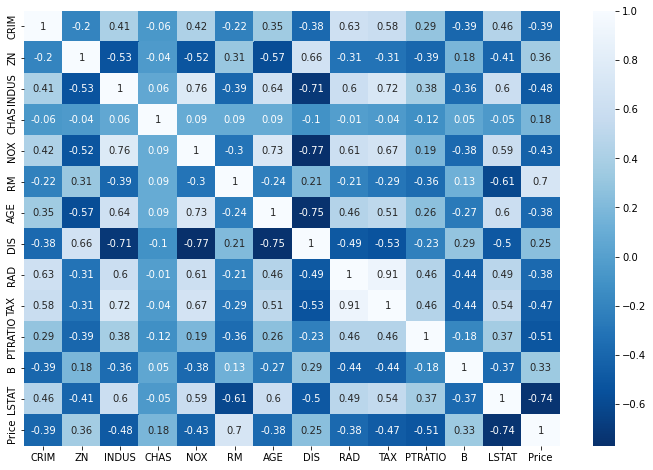

In [ ]:
#Create a correlation matrix that measures the linear relationships between the variables
correlation_matrix = df_boston.corr().round(2)

# annot = True to print the values inside the square
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation_matrix, annot=True, cmap= 'Blues_r')

In [ ]:
#Preparing the data for training the Machine Learning Model

# assign features on X axis 
X_features = boston_dataset.data

# assign target on Y axis 
Y_target = boston_dataset.target

In [ ]:
#Build Linear Regression Model

# import linear model - the estimator
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

# fit data into the the estimator
lineReg.fit(X_features,Y_target)

LinearRegression()

In [ ]:
# print the intercept 
print('the estimated intercept %.2f '%lineReg.intercept_)

the estimated intercept 36.46 


In [ ]:
# print the coefficient 
print('the coefficient is %d ' %len(lineReg.coef_))

the coefficient is 13 


In [ ]:
#Model training

# train model split the whole dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target)

In [ ]:
# print the dataset shape
print(boston_dataset.data.shape)

In [ ]:
# Print shapes of the training and testing data sets
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [ ]:
# fit the training sets into the model
lineReg.fit(X_train,Y_train)

In [ ]:
#Calculate RMSE and R Square
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_train_predict = lineReg.predict(X_train)

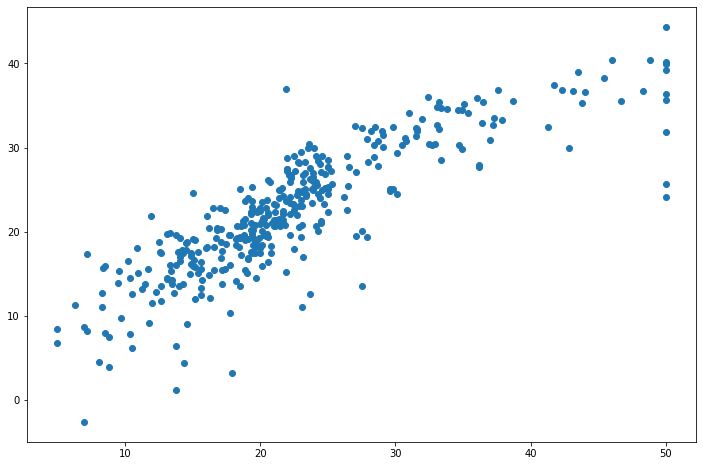

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(Y_train, y_train_predict)

In [ ]:
r2 = r2_score(Y_train, y_train_predict)

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_train,y_train_predict))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

In [ ]:
# model evaluation for testing set

y_test_predict = lineReg.predict(X_test)


# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

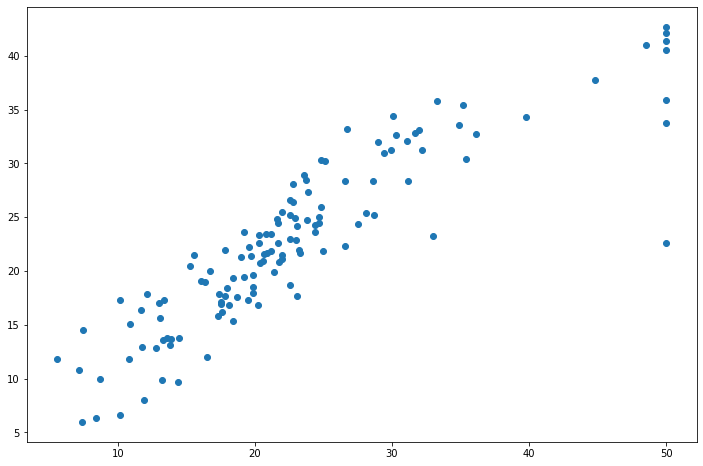

In [ ]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.figure(figsize=(12,8))
plt.scatter(Y_test, y_test_predict)
plt.show()